In [65]:
import numpy as np
from numpy import linalg as LA
import scipy

In [66]:
def gradient(gradient_f,values):
    grad = []
    for function in gradient_f:
        gradient = function(*values)
        grad.append(gradient)
#     print('gradient--->',grad)
    return np.array(grad)


In [67]:
def hassian(gradient2d_f,values):
    hassian = []
    for gradient_f in gradient2d_f:
        grad = gradient(gradient_f,values)
        hassian.append(grad)
    return np.array(hassian)

In [68]:
def gradient_direction(gradient_f,gradient2d_f,values,newton_direction=False):
    dk = []
    grad = gradient(gradient_f,values)
    if newton_direction:
        dk = - np.dot(LA.inv(hassian(gradient2d_f,values)), grad)
        if LA.norm(grad)/LA.norm(dk) < 0.01:
            dk = - grad
    else:
        dk = - grad
    return dk
        

In [69]:
f = lambda x,y: (x-2)**4 + (x-2*y)**2
dfx = lambda x,y: 4*(x-2)**3+2*(x-2*y)
dfy = lambda x,y: -4*(x-2*y)

dfx11 = lambda x,y: 12*(x-2)**2+2
dfx12 = lambda x,y: -4

dfx21 = lambda x,y: -4
dfx22 = lambda x,y: 8


In [70]:
hassian(np.array([[dfx11,dfx12],[dfx21,dfx22]]),np.array([1,2]))

array([[14, -4],
       [-4,  8]])

In [71]:
def descent_direction(gradient_f,values):
    grad = gradient(gradient_f,values)
    p =  - (LA.norm(grad))**2
    return p

In [72]:
gradient_direction(np.array([dfx,dfy]),np.array([[dfx11,dfx12],[dfx21,dfx22]]),np.array([1,2]),newton_direction=True)

array([ 0.33333333, -1.33333333])

In [73]:
def armijo_step_algorithm(f,gradient2,negative_grad,values,delta):
    ro = 1
    eta = 2
    descent = descent_direction(gradient2,values)
    while f(*(values+ro*negative_grad)) <= f(*values)+ro*delta*descent:
        ro *= 2
    
    while f(*(values+ro*negative_grad)) > f(*values)+ro*delta*descent:
        ro /= 2
    return ro

In [74]:
f = lambda x,y : 100*(y-x*x)**2 + (1-x)**2
dfx = lambda x,y: -400*x*(y-x*x) + 2*x - 2
dfy = lambda x,y: 200*(y-x*x)

# f = lambda x,y: (x-2)**4 + (x-2*y)**2
# dfx = lambda x,y: 4*(x-2)**3+2*(x-2*y)
# dfy = lambda x,y: -4*(x-2*y)

negative_grad = gradient(np.array([dfx,dfy]),np.array([1,2]))
# negative_grad = np.array([-400,-200])
delta = 10e-4
step_size = armijo_step_algorithm(f,np.array([dfx,dfy]),negative_grad,np.array([1,2]),delta)
print(step_size)

1.0842021724855044e-19


C:\Users\Mithun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in long_scalars
  """Entry point for launching an IPython kernel.


In [75]:
print(dfx(1,1))
print(dfy(1,1))

0
0


In [76]:
from numpy import linalg as LA
def general_descent(accuracy,function,gradient_f,gradient2d_f,initial,use_newton=True):
    xk = initial
    counter = 0
    xk1 = 0
    delta = 10**(-3)
    while counter <=10000:
        print(LA.norm(gradient(gradient_f,xk)))
        dk = gradient_direction(gradient_f,gradient2d_f,xk,newton_direction=use_newton)
        step_size = armijo_step_algorithm(function,gradient_f,dk,xk,delta)
        xk1 = xk + step_size*dk
        xk = xk1
        print('xk1 at iterate: {}--->: {}'.format(counter,xk1))
        print('dk at iterate: {}--->: {}'.format(counter,dk))
        print('step_size at iterate: {}--->: {}'.format(counter,step_size))
        counter += 1
        if LA.norm(gradient(gradient_f,xk))<=0.0001:
            break
    return xk1

In [77]:
general_descent(10,f,np.array([dfx,dfy]),np.array([[dfx11,dfx12],[dfx21,dfx22]]),np.array([0,10]),use_newton=False
               )

2000.00099999975
xk1 at iterate: 0--->: [ 0.015625 -5.625   ]
dk at iterate: 0--->: [    2 -2000]
step_size at iterate: 0--->: 0.0078125
1125.538261057449
xk1 at iterate: 1--->: [-0.24366426  3.16444397]
dk at iterate: 1--->: [ -33.18902588 1125.04882812]
step_size at iterate: 1--->: 0.0078125
689.7457776671262
xk1 at iterate: 2--->: [-1.41612784  0.73860671]
dk at iterate: 2--->: [-300.15067609 -621.01433917]
step_size at iterate: 2--->: 0.00390625
765.5596910240787
xk1 at iterate: 3--->: [1.40582134 1.72830308]
dk at iterate: 3--->: [722.4189917  253.36227216]
step_size at iterate: 3--->: 0.00390625
148.79857086352908
xk1 at iterate: 4--->: [1.268823   1.77674655]
dk at iterate: 4--->: [-140.28630804   49.60611319]
step_size at iterate: 4--->: 0.0009765625
90.51075811487902
xk1 at iterate: 5--->: [1.35098693 1.74416164]
dk at iterate: 5--->: [ 84.13586549 -33.36695181]
step_size at iterate: 5--->: 0.0009765625
47.334896837430875
xk1 at iterate: 6--->: [1.3075532  1.75998274]
dk at it

xk1 at iterate: 245--->: [1.2974445 1.683909 ]
dk at iterate: 245--->: [ 0.38130558 -0.37601989]
step_size at iterate: 245--->: 0.0009765625
0.3297833266430646
xk1 at iterate: 246--->: [1.29683683 1.68369542]
dk at iterate: 246--->: [-0.31112457 -0.10935513]
step_size at iterate: 246--->: 0.001953125
0.5508358229307911
xk1 at iterate: 247--->: [1.29722446 1.68332244]
dk at iterate: 247--->: [ 0.39692596 -0.38192917]
step_size at iterate: 247--->: 0.0009765625
0.3360715066564804
xk1 at iterate: 248--->: [1.29660172 1.68311496]
dk at iterate: 248--->: [-0.31884045 -0.10623006]
step_size at iterate: 248--->: 0.001953125
0.5660913405060792
xk1 at iterate: 249--->: [1.29700446 1.68273626]
dk at iterate: 249--->: [ 0.41240803 -0.38778734]
step_size at iterate: 249--->: 0.0009765625
0.3423752012383777
xk1 at iterate: 250--->: [1.29636682 1.68253482]
dk at iterate: 250--->: [-0.32647144 -0.10313669]
step_size at iterate: 250--->: 0.001953125
0.5812342464501044
xk1 at iterate: 251--->: [1.29678

0.3315736515588519
xk1 at iterate: 539--->: [1.26417138 1.59809893]
dk at iterate: 539--->: [ 0.17855518 -0.27939065]
step_size at iterate: 539--->: 0.001953125
0.5437215085844376
xk1 at iterate: 540--->: [1.26364044 1.59810486]
dk at iterate: 540--->: [-0.54368763  0.00606914]
step_size at iterate: 540--->: 0.0009765625
0.29784190715027914
xk1 at iterate: 541--->: [1.26391146 1.59759013]
dk at iterate: 541--->: [ 0.13876384 -0.26354202]
step_size at iterate: 541--->: 0.001953125
0.4687832277323277
xk1 at iterate: 542--->: [1.26345424 1.59756709]
dk at iterate: 542--->: [-0.46818926 -0.02359092]
step_size at iterate: 542--->: 0.0009765625
0.2712628961244284
xk1 at iterate: 543--->: [1.26365943 1.59707863]
dk at iterate: 543--->: [ 0.10505556 -0.25009376]
step_size at iterate: 543--->: 0.001953125
0.40717359264919656
xk1 at iterate: 544--->: [1.26326465 1.59703107]
dk at iterate: 544--->: [-0.40425134 -0.04869489]
step_size at iterate: 544--->: 0.0009765625
0.25067236798129267
xk1 at it

xk1 at iterate: 887--->: [1.22437775 1.49965663]
dk at iterate: 887--->: [ 0.24195676 -0.28192807]
step_size at iterate: 887--->: 0.0009765625
0.20864089986028123
xk1 at iterate: 888--->: [1.22368803 1.49922244]
dk at iterate: 888--->: [-0.17656681 -0.11115388]
step_size at iterate: 888--->: 0.00390625
0.5686951986971811
xk1 at iterate: 889--->: [1.22411635 1.49886892]
dk at iterate: 889--->: [ 0.43859369 -0.36200802]
step_size at iterate: 889--->: 0.0009765625
0.26147846553478055
xk1 at iterate: 890--->: [1.22363116 1.49870951]
dk at iterate: 890--->: [-0.24841412 -0.08161747]
step_size at iterate: 890--->: 0.001953125
0.3845973979423099
xk1 at iterate: 891--->: [1.2238809  1.49842898]
dk at iterate: 891--->: [ 0.25573128 -0.28725715]
step_size at iterate: 891--->: 0.0009765625
0.2113987644855058
xk1 at iterate: 892--->: [1.22317313 1.49800357]
dk at iterate: 892--->: [-0.18118808 -0.10890509]
step_size at iterate: 892--->: 0.00390625
0.5899407322741808
xk1 at iterate: 893--->: [1.223

dk at iterate: 1157--->: [ 0.04579236 -0.18194876]
step_size at iterate: 1157--->: 0.00390625
0.5004117729110851
xk1 at iterate: 1158--->: [1.19412087 1.42690337]
dk at iterate: 1158--->: [-0.49832364  0.04566714]
step_size at iterate: 1158--->: 0.0009765625
0.21117608579189678
xk1 at iterate: 1159--->: [1.19427564 1.42652106]
dk at iterate: 1159--->: [ 0.07924316 -0.19574438]
step_size at iterate: 1159--->: 0.001953125
0.28387529400973216
xk1 at iterate: 1160--->: [1.19372832 1.42643248]
dk at iterate: 1160--->: [-0.2802294  -0.04535045]
step_size at iterate: 1160--->: 0.001953125
0.41846613057521964
xk1 at iterate: 1161--->: [1.19402383 1.42615022]
dk at iterate: 1161--->: [ 0.30260752 -0.28903736]
step_size at iterate: 1161--->: 0.0009765625
0.19271930984035363
xk1 at iterate: 1162--->: [1.19369252 1.42597159]
dk at iterate: 1162--->: [-0.16963358 -0.09146136]
step_size at iterate: 1162--->: 0.001953125
0.24698785456422817
xk1 at iterate: 1163--->: [1.19393353 1.42555371]
dk at iter

0.13909147545523975
xk1 at iterate: 1490--->: [1.15585874 1.33707285]
dk at iterate: 1490--->: [-0.10697627 -0.0888961 ]
step_size at iterate: 1490--->: 0.00390625
0.27859418676815295
xk1 at iterate: 1491--->: [1.1562102  1.33665745]
dk at iterate: 1491--->: [ 0.17994602 -0.21268322]
step_size at iterate: 1491--->: 0.001953125
0.38992487065664017
xk1 at iterate: 1492--->: [1.15583077 1.33668959]
dk at iterate: 1492--->: [-0.38853317  0.03291476]
step_size at iterate: 1492--->: 0.0009765625
0.15250934925118778
xk1 at iterate: 1493--->: [1.15595848 1.3361077 ]
dk at iterate: 1493--->: [ 0.03269285 -0.14896402]
step_size at iterate: 1493--->: 0.00390625
0.3740278650152053
xk1 at iterate: 1494--->: [1.15559413 1.33613354]
dk at iterate: 1494--->: [-0.37309074  0.0264602 ]
step_size at iterate: 1494--->: 0.0009765625
0.14996026517338076
xk1 at iterate: 1495--->: [1.15570703 1.33555874]
dk at iterate: 1495--->: [ 0.02890077 -0.147149  ]
step_size at iterate: 1495--->: 0.00390625
0.3581949398

xk1 at iterate: 1801--->: [1.12011318 1.25496272]
dk at iterate: 1801--->: [ 0.31023955 -0.24551481]
step_size at iterate: 1801--->: 0.0009765625
0.11902107122581412
xk1 at iterate: 1802--->: [1.11971593 1.25472117]
dk at iterate: 1802--->: [-0.10169629 -0.06183753]
step_size at iterate: 1802--->: 0.00390625
0.2693132618079778
xk1 at iterate: 1803--->: [1.11990087 1.25453418]
dk at iterate: 1803--->: [ 0.18937878 -0.19148189]
step_size at iterate: 1803--->: 0.0009765625
0.1072960404454501
xk1 at iterate: 1804--->: [1.11927408 1.25397758]
dk at iterate: 1804--->: [-0.08022922 -0.07124404]
step_size at iterate: 1804--->: 0.0078125
0.3846559229016175
xk1 at iterate: 1805--->: [1.11956715 1.2537426 ]
dk at iterate: 1805--->: [ 0.30010039 -0.24062406]
step_size at iterate: 1805--->: 0.0009765625
0.11737202304379074
xk1 at iterate: 1806--->: [1.11917883 1.25349885]
dk at iterate: 1806--->: [-0.09940968 -0.06240117]
step_size at iterate: 1806--->: 0.00390625
0.26088681805161
xk1 at iterate: 1

step_size at iterate: 2085--->: 0.0078125
0.22923302097857148
xk1 at iterate: 2086--->: [1.08598637 1.17974706]
dk at iterate: 2086--->: [-0.22781049  0.02549823]
step_size at iterate: 2086--->: 0.0009765625
0.07641898873168161
xk1 at iterate: 2087--->: [1.08593468 1.17915228]
dk at iterate: 2087--->: [-0.00661598 -0.07613206]
step_size at iterate: 2087--->: 0.0078125
0.217072993910417
xk1 at iterate: 2088--->: [1.08551258 1.17919207]
dk at iterate: 2088--->: [-0.21611493  0.02037211]
step_size at iterate: 2088--->: 0.001953125
0.263072092055196
xk1 at iterate: 2089--->: [1.0857079  1.17902517]
dk at iterate: 2089--->: [ 0.20000106 -0.17089909]
step_size at iterate: 2089--->: 0.0009765625
0.07761005114583103
xk1 at iterate: 2090--->: [1.08526284 1.1786134 ]
dk at iterate: 2090--->: [-0.05696782 -0.05270661]
step_size at iterate: 2090--->: 0.0078125
0.2466308746387535
xk1 at iterate: 2091--->: [1.08544307 1.17845364]
dk at iterate: 2091--->: [ 0.18456249 -0.16359547]
step_size at iterat

xk1 at iterate: 2413--->: [1.04524003 1.09204918]
dk at iterate: 2413--->: [-0.00853793 -0.03944295]
step_size at iterate: 2413--->: 0.03125
0.3054553030134178
xk1 at iterate: 2414--->: [1.04495669 1.09214245]
dk at iterate: 2414--->: [-0.2901396   0.09550894]
step_size at iterate: 2414--->: 0.0009765625
0.04169947482753442
xk1 at iterate: 2415--->: [1.04493334 1.09181751]
dk at iterate: 2415--->: [-0.00298931 -0.04159219]
step_size at iterate: 2415--->: 0.0078125
0.11914290638755899
xk1 at iterate: 2416--->: [1.04470217 1.09184414]
dk at iterate: 2416--->: [-0.11836022  0.01363414]
step_size at iterate: 2416--->: 0.001953125
0.12977597801182794
xk1 at iterate: 2417--->: [1.04488791 1.09167167]
dk at iterate: 2417--->: [ 0.09510024 -0.08830487]
step_size at iterate: 2417--->: 0.001953125
0.14156012828099515
xk1 at iterate: 2418--->: [1.04461537 1.09171818]
dk at iterate: 2418--->: [-0.13954262  0.02381442]
step_size at iterate: 2418--->: 0.001953125
0.15458766113301556
xk1 at iterate: 

0.23478149728001432
xk1 at iterate: 2709--->: [1.01540554 1.03058961]
dk at iterate: 2709--->: [ 0.20441698 -0.11548182]
step_size at iterate: 2709--->: 0.001953125
0.23574324899654603
xk1 at iterate: 2710--->: [1.01498141 1.03076883]
dk at iterate: 2710--->: [-0.21715307  0.09175743]
step_size at iterate: 2710--->: 0.001953125
0.23669939333275622
xk1 at iterate: 2711--->: [1.01538404 1.03054165]
dk at iterate: 2711--->: [ 0.20614974 -0.11631374]
step_size at iterate: 2711--->: 0.001953125
0.23765172576770882
xk1 at iterate: 2712--->: [1.01495658 1.03072255]
dk at iterate: 2712--->: [-0.21885996  0.09262105]
step_size at iterate: 2712--->: 0.001953125
0.2385982854293129
xk1 at iterate: 2713--->: [1.01536257 1.03049377]
dk at iterate: 2713--->: [ 0.20786534 -0.11713728]
step_size at iterate: 2713--->: 0.001953125
0.2395408648041867
xk1 at iterate: 2714--->: [1.01493181 1.03067634]
dk at iterate: 2714--->: [-0.22054941  0.0934761 ]
step_size at iterate: 2714--->: 0.001953125
0.2404775076

step_size at iterate: 3006--->: 0.001953125
0.019505801257667297
xk1 at iterate: 3007--->: [1.00975961 1.01961502]
dk at iterate: 3007--->: [ 0.01183666 -0.01550387]
step_size at iterate: 3007--->: 0.001953125
0.01929711009994317
xk1 at iterate: 3008--->: [1.00972192 1.0196148 ]
dk at iterate: 3008--->: [-0.0192968  -0.00011014]
step_size at iterate: 3008--->: 0.001953125
0.019091257097433666
xk1 at iterate: 3009--->: [1.00974425 1.01958494]
dk at iterate: 3009--->: [ 0.01143262 -0.01528958]
step_size at iterate: 3009--->: 0.001953125
0.018888189463957764
xk1 at iterate: 3010--->: [1.00970736 1.01958436]
dk at iterate: 3010--->: [-0.01888583 -0.00029842]
step_size at iterate: 3010--->: 0.001953125
0.018687913513174573
xk1 at iterate: 3011--->: [1.00972892 1.0195549 ]
dk at iterate: 3011--->: [ 0.01103787 -0.01507991]
step_size at iterate: 3011--->: 0.001953125
0.018490378117526348
xk1 at iterate: 3012--->: [1.00969282 1.01955396]
dk at iterate: 3012--->: [-0.01848409 -0.00048218]
step_

xk1 at iterate: 3318--->: [1.00763966 1.01538553]
dk at iterate: 3318--->: [-0.01018537 -0.00254735]
step_size at iterate: 3318--->: 0.001953125
0.010375808374541618
xk1 at iterate: 3319--->: [1.00764749 1.01536684]
dk at iterate: 3319--->: [ 0.00400789 -0.00957049]
step_size at iterate: 3319--->: 0.001953125
0.010255713562637037
xk1 at iterate: 3320--->: [1.00762815 1.01536161]
dk at iterate: 3320--->: [-0.00990019 -0.00267692]
step_size at iterate: 3320--->: 0.001953125
0.01013874968937578
xk1 at iterate: 3321--->: [1.00763545 1.0153432 ]
dk at iterate: 3321--->: [ 0.00373718 -0.00942485]
step_size at iterate: 3321--->: 0.001953125
0.010024846880820573
xk1 at iterate: 3322--->: [1.00761665 1.01533773]
dk at iterate: 3322--->: [-0.0096255  -0.00280131]
step_size at iterate: 3322--->: 0.001953125
0.009913951065350668
xk1 at iterate: 3323--->: [1.00762344 1.0153196 ]
dk at iterate: 3323--->: [ 0.00347677 -0.00928432]
step_size at iterate: 3323--->: 0.001953125
0.009805994171164992
xk1 a

xk1 at iterate: 3634--->: [1.00594717 1.0119834 ]
dk at iterate: 3634--->: [-0.01474108  0.0013863 ]
step_size at iterate: 3634--->: 0.001953125
0.014481679982845273
xk1 at iterate: 3635--->: [1.00596614 1.01196243]
dk at iterate: 3635--->: [ 0.00971411 -0.01074035]
step_size at iterate: 3635--->: 0.001953125
0.014166146524037774
xk1 at iterate: 3636--->: [1.00593855 1.01196455]
dk at iterate: 3636--->: [-0.01412419  0.00108946]
step_size at iterate: 3636--->: 0.001953125
0.013859355402869209
xk1 at iterate: 3637--->: [1.00595636 1.01194417]
dk at iterate: 3637--->: [ 0.00911948 -0.01043632]
step_size at iterate: 3637--->: 0.001953125
0.013561077103513352
xk1 at iterate: 3638--->: [1.00592993 1.01194575]
dk at iterate: 3638--->: [-0.01353702  0.00080734]
step_size at iterate: 3638--->: 0.001953125
0.013271153378039847
xk1 at iterate: 3639--->: [1.00594663 1.01192593]
dk at iterate: 3639--->: [ 0.00855385 -0.01014668]
step_size at iterate: 3639--->: 0.001953125
0.012989366571599515
xk1 

dk at iterate: 3946--->: [-0.0071556  -0.00108169]
step_size at iterate: 3946--->: 0.001953125
0.007094122160998514
xk1 at iterate: 3947--->: [1.00465702 1.00934187]
dk at iterate: 3947--->: [ 0.00330826 -0.00627551]
step_size at iterate: 3947--->: 0.001953125
0.006956707950800748
xk1 at iterate: 3948--->: [1.00464365 1.00933947]
dk at iterate: 3948--->: [-0.00684755 -0.00122753]
step_size at iterate: 3948--->: 0.001953125
0.0068245074997511325
xk1 at iterate: 3949--->: [1.00464954 1.00932751]
dk at iterate: 3949--->: [ 0.00301467 -0.00612255]
step_size at iterate: 3949--->: 0.001953125
0.006697361694339563
xk1 at iterate: 3950--->: [1.00463673 1.00932485]
dk at iterate: 3950--->: [-0.00655683 -0.00136477]
step_size at iterate: 3950--->: 0.001953125
0.00657512667925022
xk1 at iterate: 3951--->: [1.00464208 1.00931317]
dk at iterate: 3951--->: [ 0.00273791 -0.00597797]
step_size at iterate: 3951--->: 0.001953125
0.00645764962171532
xk1 at iterate: 3952--->: [1.00462981 1.00931026]
dk at

dk at iterate: 4258--->: [-0.00799204  0.00035537]
step_size at iterate: 4258--->: 0.001953125
0.007782910813127603
xk1 at iterate: 4259--->: [1.00363331 1.00727906]
dk at iterate: 4259--->: [ 0.00489616 -0.0060499 ]
step_size at iterate: 4259--->: 0.001953125
0.007573946993728611
xk1 at iterate: 4260--->: [1.00361852 1.00727936]
dk at iterate: 4260--->: [-0.00757241  0.00015234]
step_size at iterate: 4260--->: 0.001953125
0.007372819076392394
xk1 at iterate: 4261--->: [1.0036273  1.00726794]
dk at iterate: 4261--->: [ 0.00449439 -0.00584457]
step_size at iterate: 4261--->: 0.001953125
0.007179280635837344
xk1 at iterate: 4262--->: [1.00361328 1.00726787]
dk at iterate: 4262--->: [-7.17918233e-03 -3.75709857e-05]
step_size at iterate: 4262--->: 0.001953125
0.006993114659183786
xk1 at iterate: 4263--->: [1.00362132 1.00725683]
dk at iterate: 4263--->: [ 0.00411816 -0.00565194]
step_size at iterate: 4263--->: 0.001953125
0.006814088948026619
xk1 at iterate: 4264--->: [1.00360802 1.007256

0.00530511753283336
xk1 at iterate: 4563--->: [1.00284876 1.00570698]
dk at iterate: 4563--->: [ 0.00303772 -0.00434932]
step_size at iterate: 4563--->: 0.001953125
0.005162266695618806
xk1 at iterate: 4564--->: [1.00283869 1.00570645]
dk at iterate: 4564--->: [-0.00515518 -0.0002704 ]
step_size at iterate: 4564--->: 0.001953125
0.0050254557276659196
xk1 at iterate: 4565--->: [1.00284407 1.00569824]
dk at iterate: 4565--->: [ 0.00275391 -0.00420371]
step_size at iterate: 4565--->: 0.001953125
0.0048944797316677925
xk1 at iterate: 4566--->: [1.00283454 1.00569745]
dk at iterate: 4566--->: [-0.00487778 -0.00040403]
step_size at iterate: 4566--->: 0.001953125
0.00476914944137284
xk1 at iterate: 4567--->: [1.0028394  1.00568951]
dk at iterate: 4567--->: [ 0.00248956 -0.00406779]
step_size at iterate: 4567--->: 0.001953125
0.004649271159275966
xk1 at iterate: 4568--->: [1.00283038 1.00568848]
dk at iterate: 4568--->: [-0.00461916 -0.00052832]
step_size at iterate: 4568--->: 0.001953125
0.00

xk1 at iterate: 4871--->: [1.00222531 1.00445574]
dk at iterate: 4871--->: [ 0.00274731 -0.00358564]
step_size at iterate: 4871--->: 0.001953125
0.004382814193324618
xk1 at iterate: 4872--->: [1.00221675 1.00445567]
dk at iterate: 4872--->: [-4.38268315e-03 -3.38920440e-05]
step_size at iterate: 4872--->: 0.001953125
0.004254338774471469
xk1 at iterate: 4873--->: [1.00222161 1.00444893]
dk at iterate: 4873--->: [ 0.00248627 -0.00345223]
step_size at iterate: 4873--->: 0.001953125
0.004131502836772908
xk1 at iterate: 4874--->: [1.00221354 1.00444862]
dk at iterate: 4874--->: [-0.00412852 -0.000157  ]
step_size at iterate: 4874--->: 0.001953125
0.004014114708719481
xk1 at iterate: 4875--->: [1.00221792 1.00444212]
dk at iterate: 4875--->: [ 0.00224411 -0.00332823]
step_size at iterate: 4875--->: 0.001953125
0.003901980838825168
xk1 at iterate: 4876--->: [1.00221032 1.00444159]
dk at iterate: 4876--->: [-0.00389256 -0.00027105]
step_size at iterate: 4876--->: 0.001953125
0.003794920312762

xk1 at iterate: 5117--->: [1.00182563 1.00365658]
dk at iterate: 5117--->: [ 0.00148731 -0.00256172]
step_size at iterate: 5117--->: 0.001953125
0.0028833488372439473
xk1 at iterate: 5118--->: [1.00182005 1.00365581]
dk at iterate: 5118--->: [-0.00285589 -0.00039696]
step_size at iterate: 5118--->: 0.001953125
0.002808373549886316
xk1 at iterate: 5119--->: [1.00182264 1.00365097]
dk at iterate: 5119--->: [ 0.00132317 -0.00247713]
step_size at iterate: 5119--->: 0.001953125
0.002737102530511957
xk1 at iterate: 5120--->: [1.00181737 1.00365004]
dk at iterate: 5120--->: [-0.00269577 -0.00047389]
step_size at iterate: 5120--->: 0.001953125
0.0026693947136557693
xk1 at iterate: 5121--->: [1.00181966 1.00364536]
dk at iterate: 5121--->: [ 0.00117133 -0.00239868]
step_size at iterate: 5121--->: 0.001953125
0.0026051099100015
xk1 at iterate: 5122--->: [1.00181469 1.0036443 ]
dk at iterate: 5122--->: [-0.00254748 -0.00054493]
step_size at iterate: 5122--->: 0.001953125
0.0025441139276477474
xk1

xk1 at iterate: 5413--->: [1.00143828 1.00288133]
dk at iterate: 5413--->: [ 0.00069767 -0.00178319]
step_size at iterate: 5413--->: 0.001953125
0.001873182879896132
xk1 at iterate: 5414--->: [1.00143478 1.00288028]
dk at iterate: 5414--->: [-0.00179342 -0.00054079]
step_size at iterate: 5414--->: 0.001953125
0.0018338598507698603
xk1 at iterate: 5415--->: [1.00143595 1.00287689]
dk at iterate: 5415--->: [ 0.00060075 -0.00173267]
step_size at iterate: 5415--->: 0.001953125
0.0017967429123730934
xk1 at iterate: 5416--->: [1.00142932 1.00287461]
dk at iterate: 5416--->: [-0.00169855 -0.00058583]
step_size at iterate: 5416--->: 0.00390625
0.0038944197138620954
xk1 at iterate: 5417--->: [1.00143463 1.00286916]
dk at iterate: 5417--->: [ 0.00272122 -0.00278594]
step_size at iterate: 5417--->: 0.001953125
0.0037579564273564426
xk1 at iterate: 5418--->: [1.00142734 1.00287001]
dk at iterate: 5418--->: [-0.00373312  0.00043131]
step_size at iterate: 5418--->: 0.001953125
0.003627412054461499
x

xk1 at iterate: 5695--->: [1.0011466  1.00229231]
dk at iterate: 5695--->: [ 0.00047588 -0.00138111]
step_size at iterate: 5695--->: 0.00390625
0.0032094541289104123
xk1 at iterate: 5696--->: [1.0011404  1.00229317]
dk at iterate: 5696--->: [-0.00317883  0.0004423 ]
step_size at iterate: 5696--->: 0.001953125
0.0030935772059239772
xk1 at iterate: 5697--->: [1.00114461 1.00228884]
dk at iterate: 5697--->: [ 0.00215781 -0.00221677]
step_size at iterate: 5697--->: 0.001953125
0.0029828126095420935
xk1 at iterate: 5698--->: [1.00113882 1.0022895 ]
dk at iterate: 5698--->: [-0.00296373  0.00033687]
step_size at iterate: 5698--->: 0.001953125
0.002876970495647108
xk1 at iterate: 5699--->: [1.00114263 1.00228538]
dk at iterate: 5699--->: [ 0.00195272 -0.00211278]
step_size at iterate: 5699--->: 0.001953125
0.002775863180857266
xk1 at iterate: 5700--->: [1.00113723 1.00228584]
dk at iterate: 5700--->: [-0.00276548  0.00023983]
step_size at iterate: 5700--->: 0.001953125
0.0026793150482119833
x

0.0012023853259377545
xk1 at iterate: 5968--->: [1.00091753 1.00184144]
dk at iterate: 5968--->: [-0.00115234 -0.00034329]
step_size at iterate: 5968--->: 0.001953125
0.001175979937312625
xk1 at iterate: 5969--->: [1.00091828 1.00183928]
dk at iterate: 5969--->: [ 0.00038755 -0.00111028]
step_size at iterate: 5969--->: 0.001953125
0.0011511172398197026
xk1 at iterate: 5970--->: [1.00091403 1.00183782]
dk at iterate: 5970--->: [-0.00108883 -0.00037352]
step_size at iterate: 5970--->: 0.00390625
0.0024954679714646673
xk1 at iterate: 5971--->: [1.00091744 1.00183433]
dk at iterate: 5971--->: [ 0.00174433 -0.00178456]
step_size at iterate: 5971--->: 0.001953125
0.0024044119618792472
xk1 at iterate: 5972--->: [1.00091277 1.00183487]
dk at iterate: 5972--->: [-0.00238846  0.00027654]
step_size at iterate: 5972--->: 0.001953125
0.0023174710688301527
xk1 at iterate: 5973--->: [1.00091585 1.00183155]
dk at iterate: 5973--->: [ 0.00157591 -0.00169917]
step_size at iterate: 5973--->: 0.001953125


xk1 at iterate: 6282--->: [1.0007114 1.0014283]
dk at iterate: 6282--->: [-0.00118723 -0.00012001]
step_size at iterate: 6282--->: 0.001953125
0.0011578050374321022
xk1 at iterate: 6283--->: [1.00071253 1.00142635]
dk at iterate: 6283--->: [ 0.00058127 -0.00100132]
step_size at iterate: 6283--->: 0.001953125
0.0011242035448541898
xk1 at iterate: 6284--->: [1.00071036 1.00142604]
dk at iterate: 6284--->: [-0.00111336 -0.00015574]
step_size at iterate: 6284--->: 0.001953125
0.00109239993314377
xk1 at iterate: 6285--->: [1.00071136 1.00142416]
dk at iterate: 6285--->: [ 0.00051133 -0.00096534]
step_size at iterate: 6285--->: 0.001953125
0.0010623190162881737
xk1 at iterate: 6286--->: [1.00070931 1.00142379]
dk at iterate: 6286--->: [-0.00104546 -0.00018849]
step_size at iterate: 6286--->: 0.001953125
0.0010338882424516214
xk1 at iterate: 6287--->: [1.00071019 1.00142197]
dk at iterate: 6287--->: [ 0.00044711 -0.00093221]
step_size at iterate: 6287--->: 0.001953125
0.0010070366413592923
xk

xk1 at iterate: 6586--->: [1.00055548 1.00111666]
dk at iterate: 6586--->: [-0.00154821  0.00021549]
step_size at iterate: 6586--->: 0.001953125
0.0015041445867109082
xk1 at iterate: 6587--->: [1.00055752 1.00111455]
dk at iterate: 6587--->: [ 0.00104805 -0.0010789 ]
step_size at iterate: 6587--->: 0.001953125
0.0014478763301123076
xk1 at iterate: 6588--->: [1.00055471 1.00111487]
dk at iterate: 6588--->: [-0.00143881  0.00016179]
step_size at iterate: 6588--->: 0.001953125
0.001394226922597495
xk1 at iterate: 6589--->: [1.00055656 1.00111286]
dk at iterate: 6589--->: [ 0.00094392 -0.0010261 ]
step_size at iterate: 6589--->: 0.001953125
0.0013430925623311805
xk1 at iterate: 6590--->: [1.00055394 1.00111308]
dk at iterate: 6590--->: [-0.00133837  0.00011256]
step_size at iterate: 6590--->: 0.001953125
0.0012943748290738237
xk1 at iterate: 6591--->: [1.0005556  1.00111117]
dk at iterate: 6591--->: [ 0.00084837 -0.00097759]
step_size at iterate: 6591--->: 0.001953125
0.0012479781571544419

0.0006533174502652968
xk1 at iterate: 6894--->: [1.0004337  1.00087044]
dk at iterate: 6894--->: [-0.00064344 -0.00011318]
step_size at iterate: 6894--->: 0.001953125
0.0006353675975194063
xk1 at iterate: 6895--->: [1.00043424 1.00086932]
dk at iterate: 6895--->: [ 0.00027686 -0.00057188]
step_size at iterate: 6895--->: 0.001953125
0.0006184336594742506
xk1 at iterate: 6896--->: [1.00043306 1.00086906]
dk at iterate: 6896--->: [-0.00060416 -0.0001321 ]
step_size at iterate: 6896--->: 0.001953125
0.0006024706229575911
xk1 at iterate: 6897--->: [1.00043352 1.00086798]
dk at iterate: 6897--->: [ 0.00023977 -0.0005527 ]
step_size at iterate: 6897--->: 0.001953125
0.0005874345830718657
xk1 at iterate: 6898--->: [1.00043241 1.00086769]
dk at iterate: 6898--->: [-0.00056812 -0.0001494 ]
step_size at iterate: 6898--->: 0.001953125
0.0005732829739533798
xk1 at iterate: 6899--->: [1.00043282 1.00086665]
dk at iterate: 6899--->: [ 0.00020578 -0.00053508]
step_size at iterate: 6899--->: 0.00195312

xk1 at iterate: 7190--->: [1.00034071 1.00068474]
dk at iterate: 7190--->: [-0.00090493  0.00010995]
step_size at iterate: 7190--->: 0.001953125
0.0008770485921563316
xk1 at iterate: 7191--->: [1.00034188 1.00068349]
dk at iterate: 7191--->: [ 0.00059945 -0.00064022]
step_size at iterate: 7191--->: 0.001953125
0.0008441528304228415
xk1 at iterate: 7192--->: [1.00034024 1.00068364]
dk at iterate: 7192--->: [-8.40509202e-04  7.83471961e-05]
step_size at iterate: 7192--->: 0.001953125
0.0008128291824942249
xk1 at iterate: 7193--->: [1.00034129 1.00068245]
dk at iterate: 7193--->: [ 0.00053819 -0.00060913]
step_size at iterate: 7193--->: 0.001953125
0.0007830145588189572
xk1 at iterate: 7194--->: [1.00033976 1.00068255]
dk at iterate: 7194--->: [-7.81453449e-04  4.94196973e-05]
step_size at iterate: 7194--->: 0.001953125
0.0007546488213552916
xk1 at iterate: 7195--->: [1.00034071 1.00068141]
dk at iterate: 7195--->: [ 0.00048207 -0.0005806 ]
step_size at iterate: 7195--->: 0.001953125
0.00

xk1 at iterate: 7504--->: [1.00026428 1.00053095]
dk at iterate: 7504--->: [-6.33323273e-04  5.11297493e-05]
step_size at iterate: 7504--->: 0.001953125
0.0006119069086722028
xk1 at iterate: 7505--->: [1.00026506 1.00053005]
dk at iterate: 7505--->: [ 0.0003992  -0.00046376]
step_size at iterate: 7505--->: 0.001953125
0.0005895757583549112
xk1 at iterate: 7506--->: [1.00026391 1.0005301 ]
dk at iterate: 7506--->: [-5.88844587e-04  2.93534784e-05]
step_size at iterate: 7506--->: 0.001953125
0.0005683444192844196
xk1 at iterate: 7507--->: [1.00026461 1.00052924]
dk at iterate: 7507--->: [ 0.00035695 -0.00044227]
step_size at iterate: 7507--->: 0.001953125
0.0005481685384983927
xk1 at iterate: 7508--->: [1.00026354 1.00052926]
dk at iterate: 7508--->: [-5.48087369e-04  9.43307250e-06]
step_size at iterate: 7508--->: 0.001953125
0.0005290056719222898
xk1 at iterate: 7509--->: [1.00026416 1.00052843]
dk at iterate: 7509--->: [ 0.00031826 -0.00042256]
step_size at iterate: 7509--->: 0.001953

0.000287975890380192
xk1 at iterate: 7805--->: [1.00020777 1.00041595]
dk at iterate: 7805--->: [ 0.00011395 -0.00026447]
step_size at iterate: 7805--->: 0.001953125
0.00028070084250461587
xk1 at iterate: 7806--->: [1.00020724 1.00041581]
dk at iterate: 7806--->: [-2.71277640e-04 -7.21207664e-05]
step_size at iterate: 7806--->: 0.001953125
0.00027386174739612966
xk1 at iterate: 7807--->: [1.00020744 1.00041531]
dk at iterate: 7807--->: [ 9.74730694e-05 -2.55928227e-04]
step_size at iterate: 7807--->: 0.001953125
0.00026743775097349355
xk1 at iterate: 7808--->: [1.00020694 1.00041516]
dk at iterate: 7808--->: [-2.55257839e-04 -7.97896388e-05]
step_size at iterate: 7808--->: 0.001953125
0.00026140861217429783
xk1 at iterate: 7809--->: [1.00020726 1.00041419]
dk at iterate: 7809--->: [ 8.23961865e-05 -2.48083315e-04]
step_size at iterate: 7809--->: 0.00390625
0.0005684560146513502
xk1 at iterate: 7810--->: [1.00020616 1.00041433]
dk at iterate: 7810--->: [-5.63552678e-04  7.45024790e-05]


0.0002268499901106745
xk1 at iterate: 8113--->: [1.00016188 1.00032405]
dk at iterate: 8113--->: [ 9.16735660e-05 -2.07501507e-04]
step_size at iterate: 8113--->: 0.001953125
0.00022101289085055706
xk1 at iterate: 8114--->: [1.00016146 1.00032395]
dk at iterate: 8114--->: [-2.14107566e-04 -5.48146700e-05]
step_size at iterate: 8114--->: 0.001953125
0.000215524830208795
xk1 at iterate: 8115--->: [1.00016161 1.00032356]
dk at iterate: 8115--->: [ 7.85490512e-05 -2.00701268e-04]
step_size at iterate: 8115--->: 0.001953125
0.0002103691978229261
xk1 at iterate: 8116--->: [1.00016122 1.00032344]
dk at iterate: 8116--->: [-2.01353482e-04 -6.09259761e-05]
step_size at iterate: 8116--->: 0.001953125
0.00020552986759102507
xk1 at iterate: 8117--->: [1.00016148 1.00032268]
dk at iterate: 8117--->: [ 6.65432445e-05 -1.94459567e-04]
step_size at iterate: 8117--->: 0.00390625
0.000450098274768259
xk1 at iterate: 8118--->: [1.00016061 1.0003228 ]
dk at iterate: 8118--->: [-4.45883437e-04  6.14525654e

step_size at iterate: 8412--->: 0.001953125
0.00022118780221199109
xk1 at iterate: 8413--->: [1.00012695 1.00025402]
dk at iterate: 8413--->: [ 0.00011922 -0.00018631]
step_size at iterate: 8413--->: 0.001953125
0.00021411747735329266
xk1 at iterate: 8414--->: [1.00012653 1.00025398]
dk at iterate: 8414--->: [-2.13145968e-04 -2.03737712e-05]
step_size at iterate: 8414--->: 0.001953125
0.00020743174180241802
xk1 at iterate: 8415--->: [1.00012674 1.00025363]
dk at iterate: 8415--->: [ 0.00010489 -0.00017896]
step_size at iterate: 8415--->: 0.001953125
0.00020111425452154377
xk1 at iterate: 8416--->: [1.00012635 1.00025357]
dk at iterate: 8416--->: [-1.99280846e-04 -2.70940520e-05]
step_size at iterate: 8416--->: 0.001953125
0.0001951492118524101
xk1 at iterate: 8417--->: [1.00012653 1.00025324]
dk at iterate: 8417--->: [ 9.17827428e-05 -1.72218300e-04]
step_size at iterate: 8417--->: 0.001953125
0.00018952127839243148
xk1 at iterate: 8418--->: [1.00012616 1.00025317]
dk at iterate: 8418-

0.0002760221755366251
xk1 at iterate: 8682--->: [1.00010168 1.00020434]
dk at iterate: 8682--->: [-2.73833083e-04  3.46941504e-05]
step_size at iterate: 8682--->: 0.001953125
0.0002653453940704889
xk1 at iterate: 8683--->: [1.00010204 1.00020397]
dk at iterate: 8683--->: [ 0.0001823  -0.00019281]
step_size at iterate: 8683--->: 0.001953125
0.00025518259122234074
xk1 at iterate: 8684--->: [1.00010154 1.00020401]
dk at iterate: 8684--->: [-2.53961125e-04  2.49379577e-05]
step_size at iterate: 8684--->: 0.001953125
0.0002455128273267794
xk1 at iterate: 8685--->: [1.00010186 1.00020366]
dk at iterate: 8685--->: [ 0.00016341 -0.00018323]
step_size at iterate: 8685--->: 0.001953125
0.00023631599854096838
xk1 at iterate: 8686--->: [1.0001014  1.00020369]
dk at iterate: 8686--->: [-2.35772282e-04  1.60213051e-05]
step_size at iterate: 8686--->: 0.001953125
0.0002275728706061072
xk1 at iterate: 8687--->: [1.00010169 1.00020335]
dk at iterate: 8687--->: [ 0.00014614 -0.00017445]
step_size at ite

dk at iterate: 8951--->: [ 7.02591227e-05 -1.17053069e-04]
step_size at iterate: 8951--->: 0.001953125
0.00013229321613128858
xk1 at iterate: 8952--->: [1.00008181 1.0001642 ]
dk at iterate: 8952--->: [-1.31268402e-04 -1.64347731e-05]
step_size at iterate: 8952--->: 0.001953125
0.00012830124289896187
xk1 at iterate: 8953--->: [1.00008193 1.00016398]
dk at iterate: 8953--->: [ 6.15441067e-05 -1.12576782e-04]
step_size at iterate: 8953--->: 0.001953125
0.00012453409230772663
xk1 at iterate: 8954--->: [1.00008169 1.00016394]
dk at iterate: 8954--->: [-1.22832510e-04 -2.05162066e-05]
step_size at iterate: 8954--->: 0.001953125
0.00012098189389969023
xk1 at iterate: 8955--->: [1.0000818  1.00016373]
dk at iterate: 8955--->: [ 5.35748782e-05 -1.08472813e-04]
step_size at iterate: 8955--->: 0.001953125
0.00011763506431497738
xk1 at iterate: 8956--->: [1.00008157 1.00016368]
dk at iterate: 8956--->: [-1.15110131e-04 -2.42418251e-05]
step_size at iterate: 8956--->: 0.001953125
0.000114484305480

array([1.00007816, 1.00015649])

In [78]:
import matplotlib.pyplot as plt
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)
fx = f(x,y)

In [79]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def draw_function(x,y,f):
    fig = plt.figure(figsize=(20, 10))
    ax = plt.gca(projection='3d')
    s=0.5
    x,y = np.meshgrid(x,y)
    z= f(x,y)
    ax.plot_surface(x, y, z)

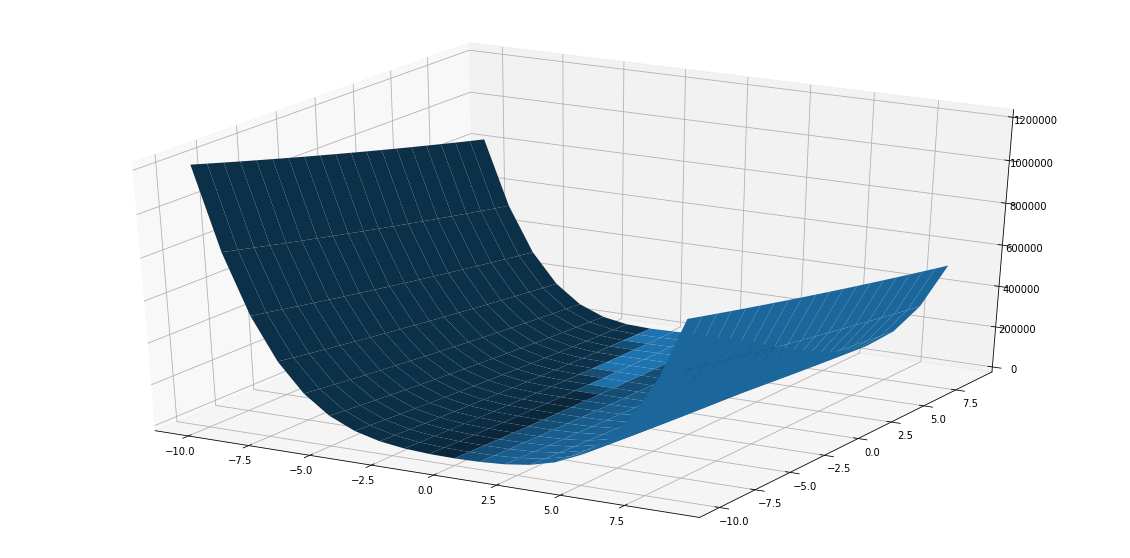

In [80]:
draw_function(x,y,f)